In [105]:
f = open("../in_depth_results.txt", "r")
text = f.read()

In [106]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {}
    
    elements = line.split()

    if len(elements) == 4 and elements[0] == "avg_evals:":
        cases[casename][algorithm]["avg_evals"] = int(elements[1])
        cases[casename][algorithm]["sd_evals"] = int(elements[3])
    if len(elements) == 4 and elements[0] == "avg_steps:":
        cases[casename][algorithm]["avg_steps"] = int(elements[1])
        cases[casename][algorithm]["sd_steps"] = int(elements[3])
        
    if len(elements) > 6:
        cases[casename][algorithm]["min"] = int(elements[0])
        cases[casename][algorithm]["avg"] = int(elements[1])
        cases[casename][algorithm]["sd"]  = int(elements[2])
        cases[casename][algorithm]["max"] = int(elements[3])
        cases[casename][algorithm]["avg_time"] = int(elements[4][:-4])
        cases[casename][algorithm]["sd_time"] = int(elements[5][:-4])

        
        cases[casename][algorithm]["efficiency"] = cases[casename][algorithm]["min"] / cases[casename][algorithm]["avg_time"]
        ### Check the efficiency

        cases[casename][algorithm]["cycle"] = [i for i in elements[6:]]

        next_dict = {}
        for index, item in enumerate(cases[casename][algorithm]["cycle"]):
            next_dict[item] = cases[casename][algorithm]["cycle"][(index + 1)% len(cases[casename][algorithm]["cycle"])]

        cases[casename][algorithm]["next_dict"] = next_dict


In [107]:
def cycle_similarity(c1, c2_dict):
    same_edge_count = 0
    for index, node in enumerate(c1):
        if c2_dict[node] == c1[(index+1) % len(c1)]: 
            same_edge_count += 1

    return same_edge_count / len(c1)

In [108]:
print(cycle_similarity(cases["ATSP/br17.atsp"]["R"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["G"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["S"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))

0.058823529411764705
1.0
0.23529411764705882


In [109]:
print(cases)

{'ATSP/br17.atsp': {'R': {'avg_evals': 127252, 'sd_evals': 3551, 'min': 47, 'avg': 247, 'sd': 58, 'max': 445, 'avg_time': 7, 'sd_time': 10, 'efficiency': 6.714285714285714, 'cycle': ['15', '7', '16', '8', '9', '10', '12', '11', '1', '2', '13', '0', '6', '5', '3', '4', '14'], 'next_dict': {'15': '7', '7': '16', '16': '8', '8': '9', '9': '10', '10': '12', '12': '11', '11': '1', '1': '2', '2': '13', '13': '0', '0': '6', '6': '5', '5': '3', '3': '4', '4': '14', '14': '15'}}, 'RW': {'avg_evals': 358899, 'sd_evals': 3947, 'min': 43, 'avg': 247, 'sd': 58, 'max': 445, 'avg_time': 2, 'sd_time': 7, 'efficiency': 21.5, 'cycle': ['4', '6', '5', '15', '14', '1', '12', '11', '0', '9', '13', '2', '10', '8', '7', '16', '3'], 'next_dict': {'4': '6', '6': '5', '5': '15', '15': '14', '14': '1', '1': '12', '12': '11', '11': '0', '0': '9', '9': '13', '13': '2', '2': '10', '10': '8', '8': '7', '7': '16', '16': '3', '3': '4'}}, 'H': {'avg_evals': 0, 'sd_evals': 0, 'min': 39, 'avg': 125, 'sd': 50, 'max': 348,

In [110]:
print(text)

Problem ATSP/br17.atsp:
R runs for 1 seconds:
avg_evals: 127252 sd: 3551
47 247 58 445 7mics 10mics 15 7 16 8 9 10 12 11 1 2 13 0 6 5 3 4 14 

RW runs for 1 seconds:
avg_evals: 358899 sd: 3947
43 247 58 445 2mics 7mics 4 6 5 15 14 1 12 11 0 9 13 2 10 8 7 16 3 

H runs for 1 seconds:
avg_evals: 0 sd: 0
39 125 50 348 952mics 398mics 15 14 6 5 4 3 7 8 16 1 10 9 12 2 13 11 0 

G runs for 1 seconds:
avg_steps: 16 sd: 3
avg_evals: 961088 sd: 439077
39 39 0 39 511mics 990mics 14 0 11 2 13 10 1 12 9 16 7 8 4 3 5 15 6 

S runs for 1 seconds:
avg_steps: 8 sd: 1
avg_evals: 418808 sd: 66769
39 39 0 39 4839mics 5114mics 5 15 12 1 10 9 2 13 11 0 8 7 16 4 3 6 14 

Problem ATSP/ftv33.atsp:
R runs for 1 seconds:
avg_evals: 19820 sd: 1383
3127 4367 266 5385 48mics 193mics 31 9 14 27 26 23 29 1 5 6 4 15 10 21 33 28 32 12 13 2 30 22 18 17 11 8 7 16 3 20 25 0 24 19 

RW runs for 1 seconds:
avg_evals: 181014 sd: 36815
3056 4367 265 5509 4mics 15mics 24 29 22 21 26 30 32 11 31 19 18 0 14 33 5 6 2 16 3 9 7 8 

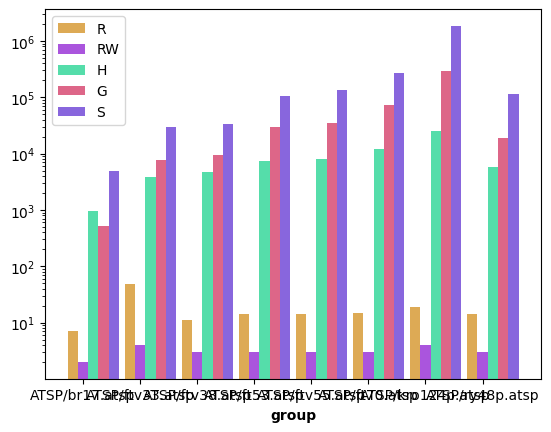

In [114]:
import matplotlib.pyplot as plt
import numpy as np

dataset = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["avg_time"] for case in cases.keys()]

ticks = list(cases.keys()) ### instances
 
# set width of bars
barWidth = 0.18
 
# Set position of bar on X axis
r_list = []
r_list.append(np.arange(len(dataset["R"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#ddaa55", "#aa55dd", "#55ddaa", "#dd6688", "#8866dd"]
 
# Make the plot
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], log = True, color = colors[index], width=barWidth, label=key)
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataset["R"]))], ticks)
 
# Create legend & Show graphic
plt.legend()
plt.show()
